In [192]:
import numpy as np
T = 1
N=100
Lx=20
Ly=10
epsilon=1
siagma=1
rc=2.5*siagma
displacment=[]
delta_t=1
for i in range(1,11):
    for j in range(1,11):
        displacment.append((i,j))
x_velocity = np.random.normal(0, np.sqrt(T), N)
y_velocity = np.random.normal(0, np.sqrt(T), N)
x_velocity -= np.mean(x_velocity)
y_velocity -= np.mean(y_velocity)
velocity=[]
for i in range(x_velocity.shape[0]):
    velocity.append([x_velocity[i],y_velocity[i]])
velocity=np.array(velocity)

In [193]:
def force_compute(x1,y1,x2,y2):
    x=np.min([abs(x2-x1),10-abs(x2-x1)])
    y=np.min([abs(y2-y1),10-abs(y2-y1)])
    r=np.sqrt(x**2+y**2)
    if r<rc:
        return 24*((2/r**14)-1/r**8)*np.array([x,y])
    else:
        return np.array([0,0])

In [194]:
def totall_force_compute(displacment):
    Force=[]
    for i in displacment:
        Force_i=[]
        for j in displacment:
            if (i[0]-j[0])**2 + (i[1]-j[1])**2 > 0.1:
                Force_i.append(force_compute(i[0],i[1],j[0],j[1]))
        Force.append(np.array(Force_i))
    totall_force=[]
    for i in Force:
        first_Force=0
        second_Force=0
        for j in i:
            first_Force+=j[0]
            second_Force+=j[1]
        totall_force.append(np.array([first_Force,second_Force]))
    totall_force=np.array(totall_force)
    return totall_force

In [195]:
trajectory=[displacment]
for k in range(15):
    t_Force=totall_force_compute(displacment)
    displacment+=velocity*delta_t+0.5*delta_t*t_Force
    displacment[:, 0] %= Lx 
    displacment[:, 1] %= Ly
    t_Force_next = totall_force_compute(displacment)
    velocity+=0.5*delta_t*(t_Force+t_Force_next)
    trajectory.append(displacment.copy())
trajectory=np.array(trajectory)
print(trajectory.shape)


(16, 100, 2)


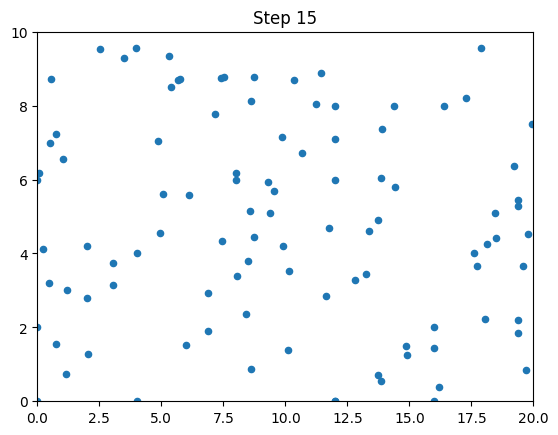

In [196]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

fig, ax = plt.subplots()
scat = ax.scatter([], [], s=20)
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)

def init():
    scat.set_offsets(np.empty((0, 2)))  # ✅ correct empty 2D array
    return scat,

def update(frame):
    positions = trajectory[frame]       # shape (100, 2)
    scat.set_offsets(positions)
    ax.set_title(f"Step {frame}")
    return scat,

anim = FuncAnimation(fig, update, frames=len(trajectory), init_func=init, blit=True)

# Save animation
anim.save("displacement_trajectory.gif", writer='pillow', fps=5)

plt.show()


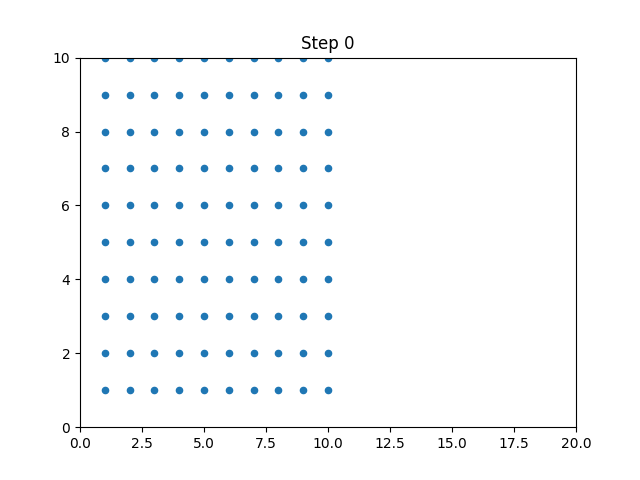

In [197]:
from IPython.display import Image
Image(filename="displacement_trajectory.gif")
